# Using deeper CNN on a small MNIST data set

In this script we build deeper CNN with many convolutional layers. Like in the experiments with the fully connected NN with MNIST that we performed last time, we use again a small data with only 2400 images in the training data set so that the NN can be trained on the CPU.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import time
import tensorflow as tf
tf.set_random_seed(1)

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D, Flatten
import keras
import sys
print ("Keras {} TF {} Python {}".format(keras.__version__, tf.__version__, sys.version_info))

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Keras 2.1.4 TF 1.6.0 Python sys.version_info(major=3, minor=5, micro=2, releaselevel='final', serial=0)


In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
X_train=x_train[0:2400]
Y_train=y_train[0:2400]

X_val=x_train[2400:3000]
Y_val=y_train[2400:3000]

X_test=x_test[0:1000]
Y_test=y_test[0:1000]

del x_train, y_train, x_test, y_test


In [3]:
X_train=np.reshape(X_train, (2400,28,28,1))
X_val=np.reshape(X_val, (600,28,28,1))
X_test=np.reshape(X_test, (1000,28,28,1))

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(2400, 28, 28, 1)
(600, 28, 28, 1)
(1000, 28, 28, 1)


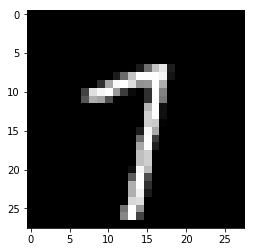

In [4]:
plt.imshow(X_train[42,:,:,0],cmap="gray")

In [5]:
def convertToOneHot(vector, num_classes=None):
    result = np.zeros((len(vector), num_classes), dtype='float32')
    result[np.arange(len(vector)), vector] = 1
    return result
print("class label")
print(Y_train[0:5])
print("class label in OneHot encodig")
print(convertToOneHot(Y_train[0:5], 10))

class label
[5 0 4 1 9]
class label in OneHot encodig
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [6]:
Y_train=convertToOneHot(Y_train,num_classes=10)
print(Y_train.shape)
Y_val=convertToOneHot(Y_val,num_classes=10)
print(Y_val.shape)

(2400, 10)
(600, 10)


In [7]:
# here we center and standardize the data
X_mean = np.mean( X_train, axis = 0)
X_std = np.std( X_train, axis = 0)

X_train = (X_train - X_mean ) / (X_std + 0.0001)
X_val = (X_val - X_mean ) / (X_std + 0.0001)

In [8]:
# here we define  hyperparameter of the NN
batch_size = 128
nb_classes = 10
nb_epoch = 30
img_rows, img_cols = 28, 28
kernel_size = (3, 3)
input_shape = (img_rows, img_cols, 1)
pool_size = (2, 2)

In [9]:
### a deeper CNN model
name = 'cnn2'
model = Sequential()

model.add(Convolution2D(8,kernel_size,padding='same',input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(8, kernel_size,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

model.add(Convolution2D(16, kernel_size,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# here is your code comming:

model.add(Convolution2D(16,kernel_size,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

# end of your code

model.add(Flatten())#macht einen vektor aus dem output
model.add(Dense(40))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 8)         32        
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 8)         584       
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 8)         32        
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
__________

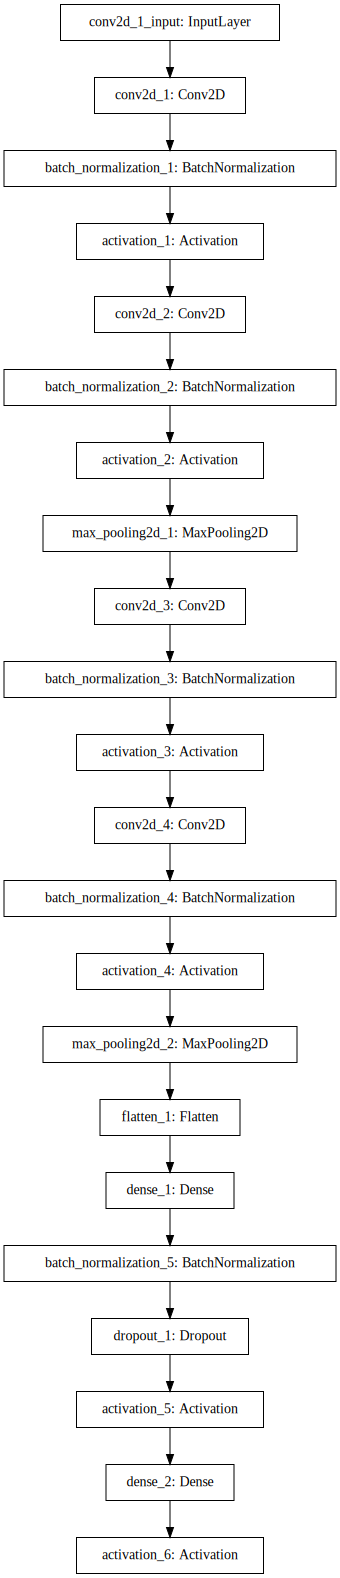

In [11]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [12]:
tensorboard = keras.callbacks.TensorBoard(
        log_dir='tensorboard/mnist/' + name + '/', 
        write_graph=True,
        histogram_freq=0)

In [13]:
history=model.fit(X_train, Y_train, 
                  batch_size=128, 
                  epochs=30,
                  verbose=2, 
                  validation_data=(X_val, Y_val),
                  callbacks=[tensorboard])

Train on 2400 samples, validate on 600 samples
Epoch 1/30
 - 11s - loss: 1.7153 - acc: 0.4804 - val_loss: 1.2256 - val_acc: 0.7783
Epoch 2/30
 - 11s - loss: 0.9528 - acc: 0.7787 - val_loss: 0.8187 - val_acc: 0.8633
Epoch 3/30
 - 12s - loss: 0.6620 - acc: 0.8667 - val_loss: 0.6418 - val_acc: 0.8850
Epoch 4/30
 - 11s - loss: 0.5180 - acc: 0.9083 - val_loss: 0.5397 - val_acc: 0.9117
Epoch 5/30
 - 11s - loss: 0.4214 - acc: 0.9283 - val_loss: 0.4307 - val_acc: 0.9200
Epoch 6/30
 - 11s - loss: 0.3447 - acc: 0.9438 - val_loss: 0.3799 - val_acc: 0.9317
Epoch 7/30
 - 11s - loss: 0.3088 - acc: 0.9479 - val_loss: 0.3551 - val_acc: 0.9367
Epoch 8/30
 - 11s - loss: 0.2643 - acc: 0.9583 - val_loss: 0.3236 - val_acc: 0.9467
Epoch 9/30
 - 11s - loss: 0.2252 - acc: 0.9633 - val_loss: 0.3015 - val_acc: 0.9500
Epoch 10/30
 - 11s - loss: 0.2086 - acc: 0.9667 - val_loss: 0.2851 - val_acc: 0.9500
Epoch 11/30
 - 11s - loss: 0.1763 - acc: 0.9762 - val_loss: 0.2772 - val_acc: 0.9500
Epoch 12/30
 - 11s - loss: 

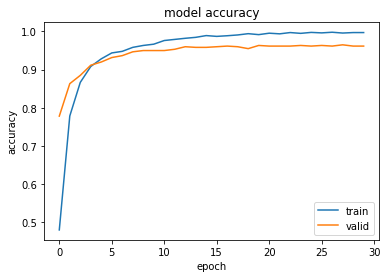

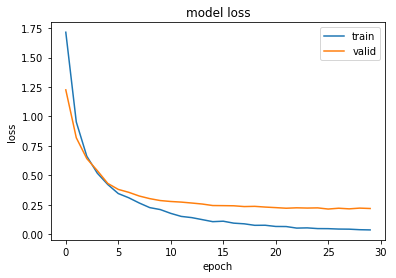

In [14]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

## Prediction on the test set


In [15]:
X_test_norm = np.array((X_test - X_mean ) / (X_std + 0.0001),dtype="float32")
pred=model.predict(X_test_norm)
print(confusion_matrix(Y_test,np.argmax(pred,axis=1)))
print("Acc = " ,np.sum(Y_test==np.argmax(pred,axis=1))/len(pred))

[[ 84   0   0   0   0   0   1   0   0   0]
 [  0 125   1   0   0   0   0   0   0   0]
 [  0   1 108   0   0   0   0   2   4   1]
 [  0   0   0 102   0   2   0   1   1   1]
 [  0   0   0   0 100   0   2   1   1   6]
 [  0   0   0   3   0  81   1   1   1   0]
 [  2   0   0   0   0   2  82   0   0   1]
 [  0   1   1   1   1   0   0  94   0   1]
 [  2   0   1   1   2   0   1   1  80   1]
 [  0   0   0   0   0   0   0   2   0  92]]
Acc =  0.948


In [16]:
#!tensorboard --logdir=tensorboard/tensorboard/mnist/